In [89]:
# Standard 
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
from pandas_datareader import data, wb

from numpy.random import randn 
from datetime import datetime

#stats
from scipy import stats
from scipy.stats import pearsonr


import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [7]:
#whats is the change in price over time 
#what is the daily return of the stock on avg 
#what is the moving avg of various stocks 
#what is the correlation between different stocks' closing prices
#what is the correlation between different stocks' daily returns 
#how much value dow e put at the risk by investing in a particular stock 
#how can we attempt to predict future stock behavior

In [11]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end =datetime.now()
start =datetime(end.year-1,end.month,end.day)

In [27]:
for stock in tech_list:
    globals()[stock]=data.DataReader(stock,'yahoo',start,end)

In [29]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,134.563135,131.804087,133.200874,133.234881,9.310586e+07,132.912773
std,10.928903,11.036240,10.998967,11.020856,2.951170e+07,11.180782
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074883
25%,125.927498,123.017500,124.362501,124.827499,7.304392e+07,124.623283
50%,133.584999,130.705002,132.145004,132.000000,8.808815e+07,131.475845
75%,144.817497,142.544994,143.554996,143.324993,1.083747e+08,143.324993
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.690002


In [30]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-26 to 2021-10-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

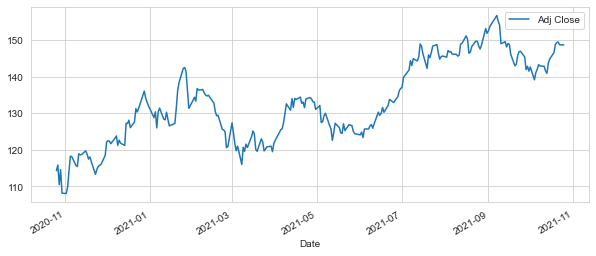

In [33]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

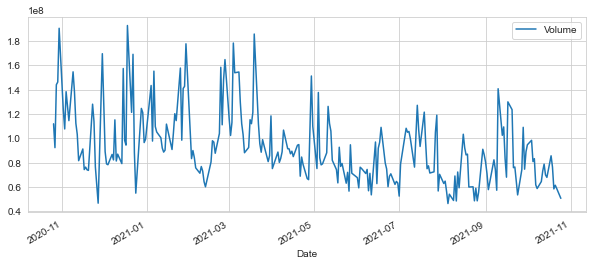

In [34]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [42]:
#moivng avg of the stocks / A moving average is the average price of a stock over a set period of time

mavg_day=[10,20,50]

for mavg in mavg_day:
    column_name='MA for %s days'%(str(mavg))
    AAPL[column_name] = AAPL['Adj Close'].rolling(mavg).mean()

<AxesSubplot:xlabel='Date'>

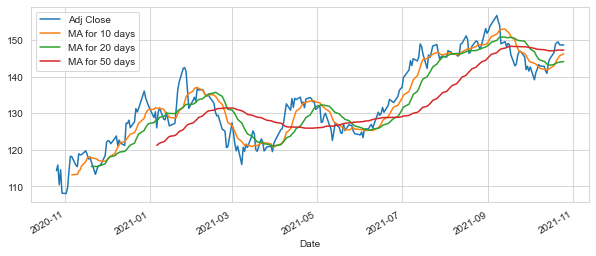

In [45]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,
                                                                       figsize=(10,4))

<AxesSubplot:xlabel='Date'>

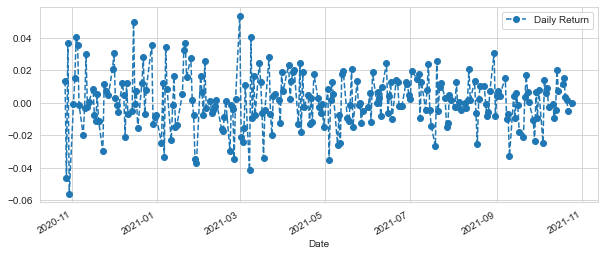

In [49]:
#2. what is the daily return of the stock on avg 

AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

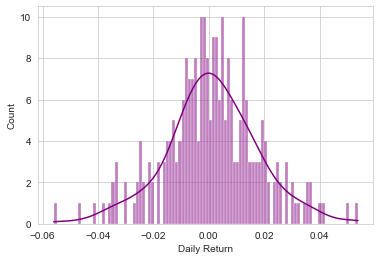

In [56]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color="purple",kde=True)

<AxesSubplot:>

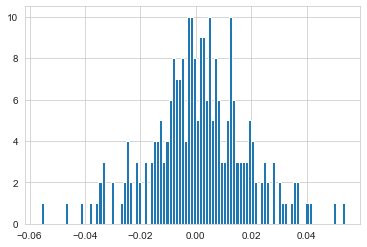

In [57]:
AAPL['Daily Return'].hist(bins=100)

In [63]:
#returns of all stocks 
closing_df=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']
tech_returns=closing_df.pct_change()
tech_returns

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-26,NaN,NaN,NaN,NaN
2020-10-27,0.013472,0.008683,0.015089,0.024724
2020-10-28,-0.046312,-0.054630,-0.049566,-0.037595
2020-10-29,0.037050,0.033377,0.010065,0.015249
2020-10-30,-0.056018,0.034309,-0.010991,-0.054456
...,...,...,...,...
2021-10-20,0.003361,-0.009783,-0.002660,-0.008446
2021-10-21,0.001474,0.002566,0.010898,0.005842
2021-10-22,-0.005285,-0.029104,-0.005149,-0.028955


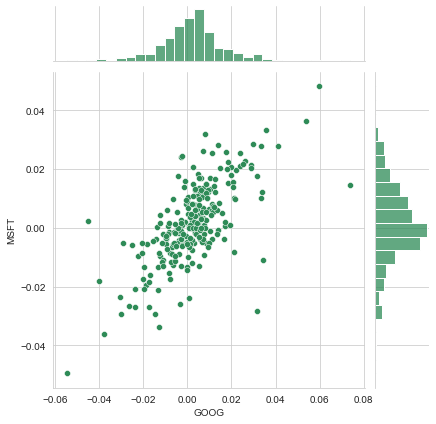

In [74]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_returns,kind='scatter',color="seagreen")

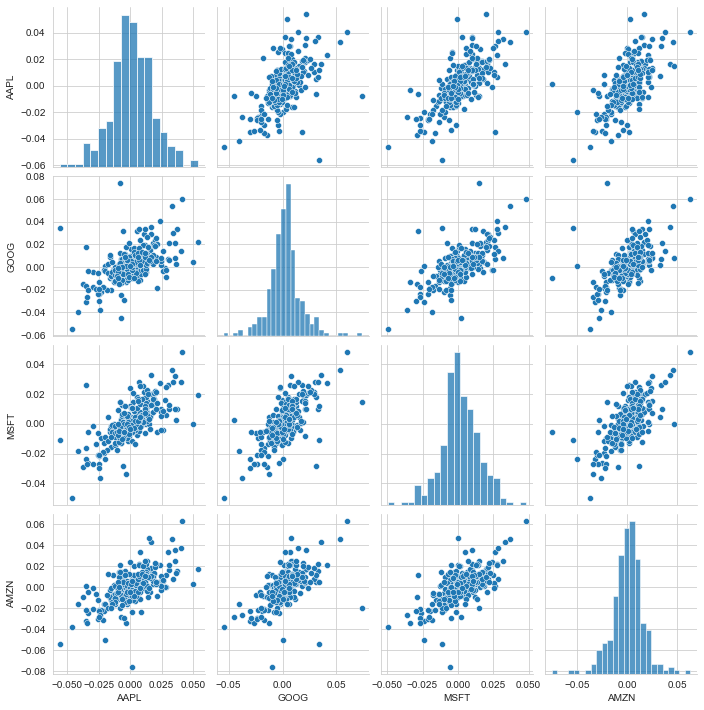

In [76]:
# repeat comparison analysis for every possible combination of stocks
sns.pairplot(tech_returns.dropna())

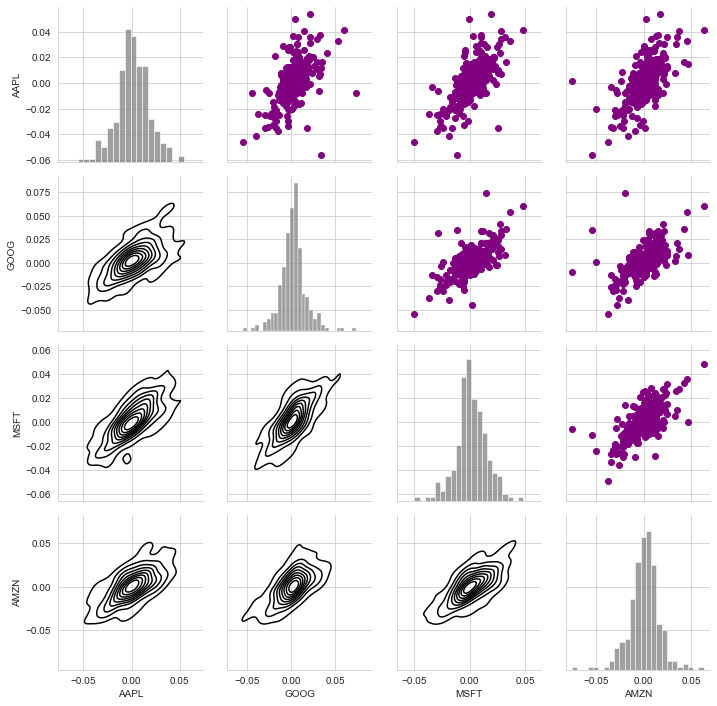

In [83]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='black')
returns_fig.map_diag(sns.histplot,color='grey')

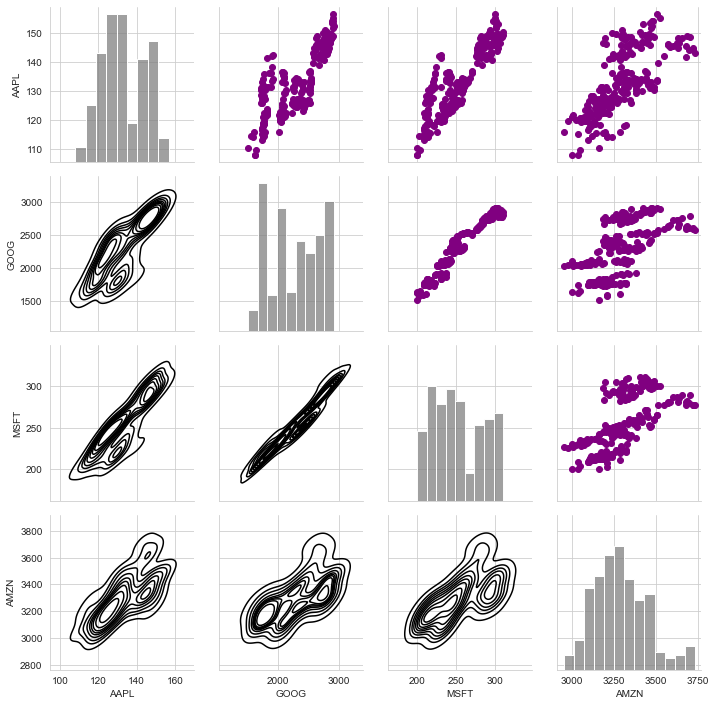

In [84]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='black')
returns_fig.map_diag(sns.histplot,color='grey')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

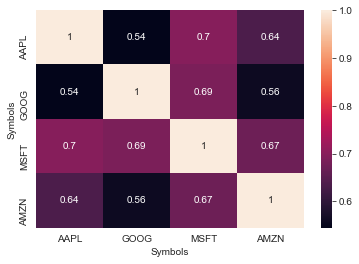

In [99]:
sns.heatmap(data = tech_returns.corr(), annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

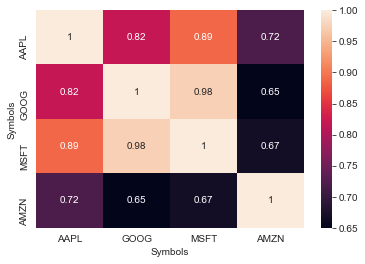

In [100]:
sns.heatmap(data = closing_df.corr(), annot=True)

In [104]:
#Stock and Risk (standard deviation)
returns=tech_returns.dropna()

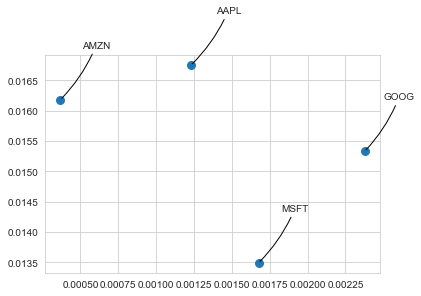

In [150]:
area=np.pi*20 #area pof the scatterplot
plt.scatter(returns.mean(),returns.std(),s=area)

plt.xlabel='Expected returns'
plt.ylabel='Risk'
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.1',color="black"))

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

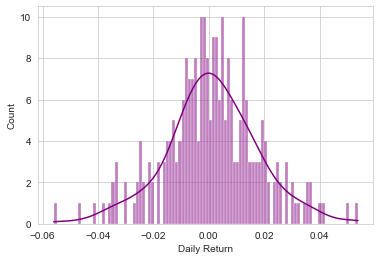

In [118]:
#value at risk with bootstrap method amount of money expect to lose for a given confidence interval 
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color="purple",kde=True)

In [119]:
returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-27,0.013472,0.008683,0.015089,0.024724
2020-10-28,-0.046312,-0.054630,-0.049566,-0.037595
2020-10-29,0.037050,0.033377,0.010065,0.015249
2020-10-30,-0.056018,0.034309,-0.010991,-0.054456
2020-11-02,-0.000827,0.003097,-0.000691,-0.010431


In [120]:
returns['AAPL'].quantile(0.05) # worst daily lost wont be more than -0,236

-0.02630397738661704

In [121]:
#value at risk using Monte Carlo method
days= 365
dt=1/days 
mu=returns.mean()['GOOG'] #average
sigma=returns.std()['GOOG'] #standard deviation 

In [125]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift =np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]= mu * dt
        price[x] = price[x-1]+ (price[x]+shock[x])
    return price 

In [126]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-26,1638.239990,1576.500000,1625.010010,1590.449951,1853300,1590.449951
2020-10-27,1606.844971,1582.780029,1595.670044,1604.260010,1229000,1604.260010
2020-10-28,1561.349976,1514.619995,1559.739990,1516.619995,1834000,1516.619995
2020-10-29,1593.709961,1522.239990,1522.359985,1567.239990,2003100,1567.239990
2020-10-30,1687.000000,1604.459961,1672.109985,1621.010010,4329100,1621.010010


Text(0.5, 1.0, 'Monte Carlo analysis for Google stocks')

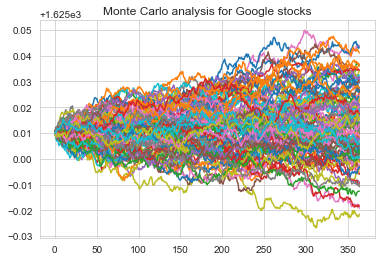

In [152]:
start_price = 1625.01
from importlib import reload
reload(plt)
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel=('Days')
plt.ylabel=('Price')
plt.title('Monte Carlo analysis for Google stocks')

In [153]:
runs=10000
simulations =np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

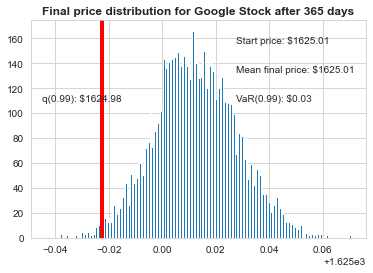

In [154]:
q= np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');